## Motivating Examples

### Falling objects

Imagine you are Galileo in the 16th century trying to describe the velocity of a falling object. An
assistant climbs the Tower of Pisa and drops a ball, while several other assistants record the position
at different times. Let’s simulate some data using the equations we know today and adding some
measurement error:

In [1]:
set.seed(1) 
g <- 9.8 ##meters per second
n <- 25
tt <- seq(0,3.4,len=n) ##time in secs, note: we use tt because t is a base function
d <- 56.67 - 0.5*g*tt^2 + rnorm(n,sd=1) ##meters

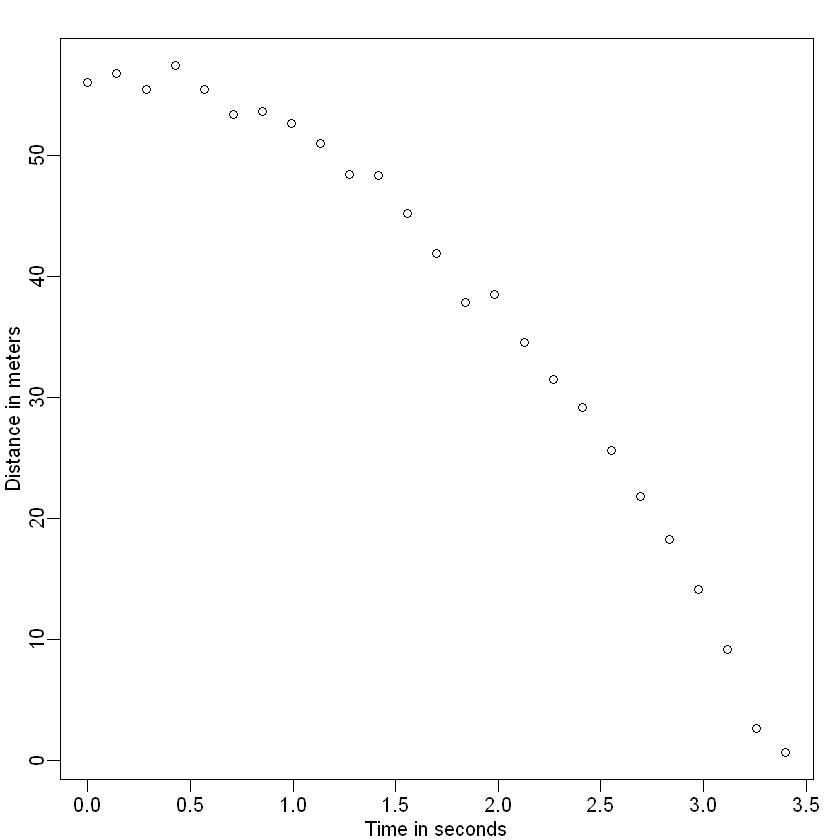

In [2]:
library(rafalib)
mypar()
plot(tt,d,ylab="Distance in meters",xlab="Time in seconds")

$$Y_i = \beta_0+\beta_1x_i+\beta_2x_i^2+\cdots$$

### Father & son heights

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer




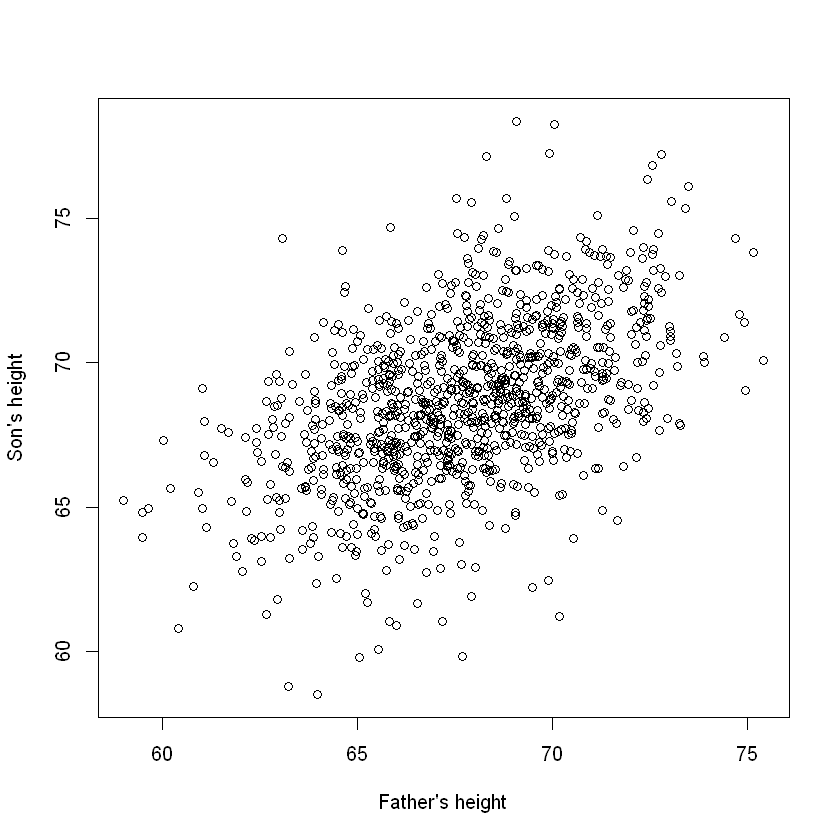

In [3]:
library(UsingR)
x=father.son$fheight
y=father.son$sheight
plot(x,y,xlab="Father's height",ylab="Son's height")

$$Y_i = \beta_0+\beta_1x_i+\epsilon$$

### Random samples from multiple populations


Attaching package: 'dplyr'


The following objects are masked from 'package:Hmisc':

    src, summarize


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




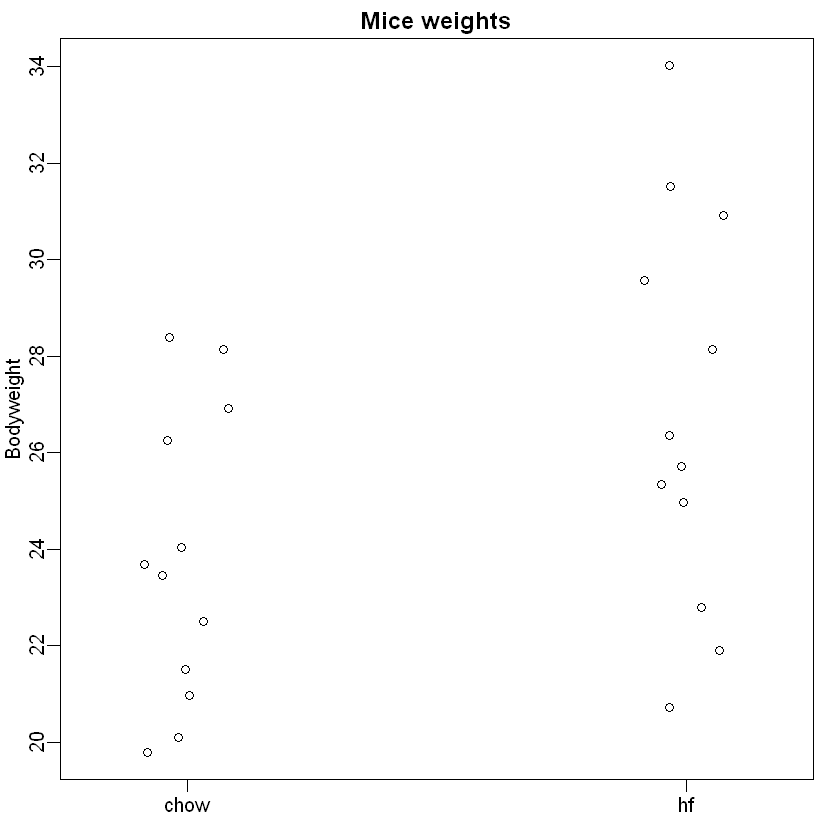

In [4]:
dat=read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\femaleMiceWeights.csv")
library(dplyr)
mypar(1,1)
stripchart(Bodyweight~Diet,data=dat,vertical=TRUE,method="jitter",pch=1,main="Mice weights")

$$Y_i = \beta_0+\beta_1x_i+\epsilon_i$$

### Falling object example revisited

$$d = h_0 + v_0t − 0.5 × 9.8t^2$$

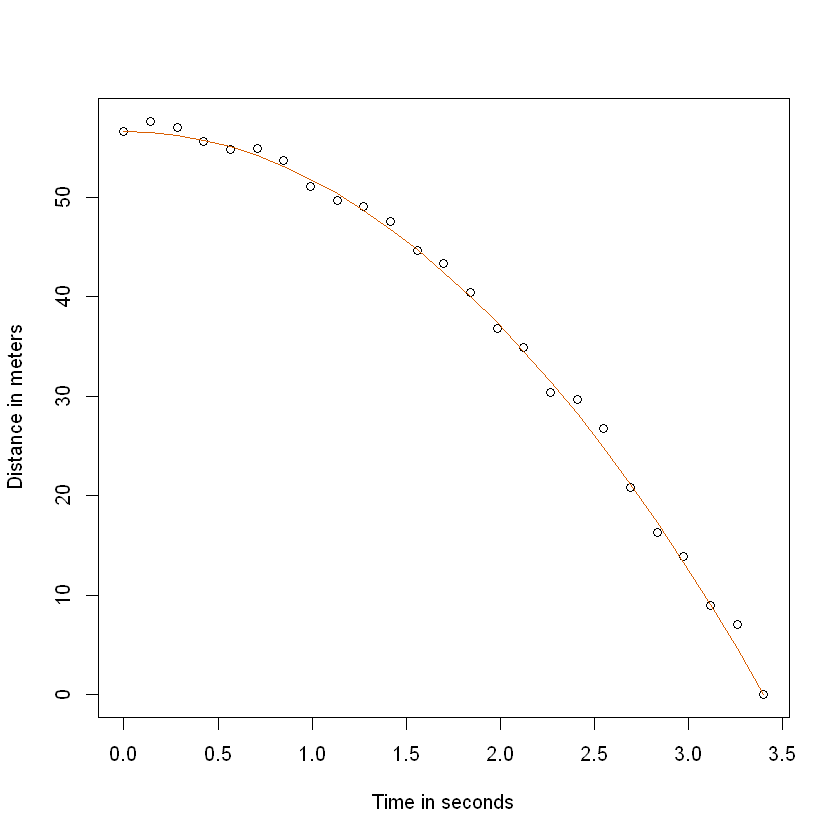

In [5]:
g <- 9.8 ##meters per second
n <- 25
tt <- seq(0,3.4,len=n) ##time in secs, t is a base function
f <- 56.67 - 0.5*g*tt^2 
y <- f + rnorm(n,sd=1)
plot(tt,y,ylab="Distance in meters",xlab="Time in seconds")
lines(tt,f,col=2)

### The lm function

In [6]:
tt2 <-tt^2
fit <- lm(y~tt+tt2)
summary(fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),57.1047803,0.4996845,114.281666,5.119823e-32
tt,-0.4460393,0.6806757,-0.655289,5.190757e-01
tt2,-4.7471698,0.1933701,-24.549662,1.767229e-17


### The least squares estimate (LSE)

In [7]:
rss <- function(Beta0,Beta1,Beta2){
r <- y - (Beta0+Beta1*tt+Beta2*tt^2)
return(sum(r^2))
}

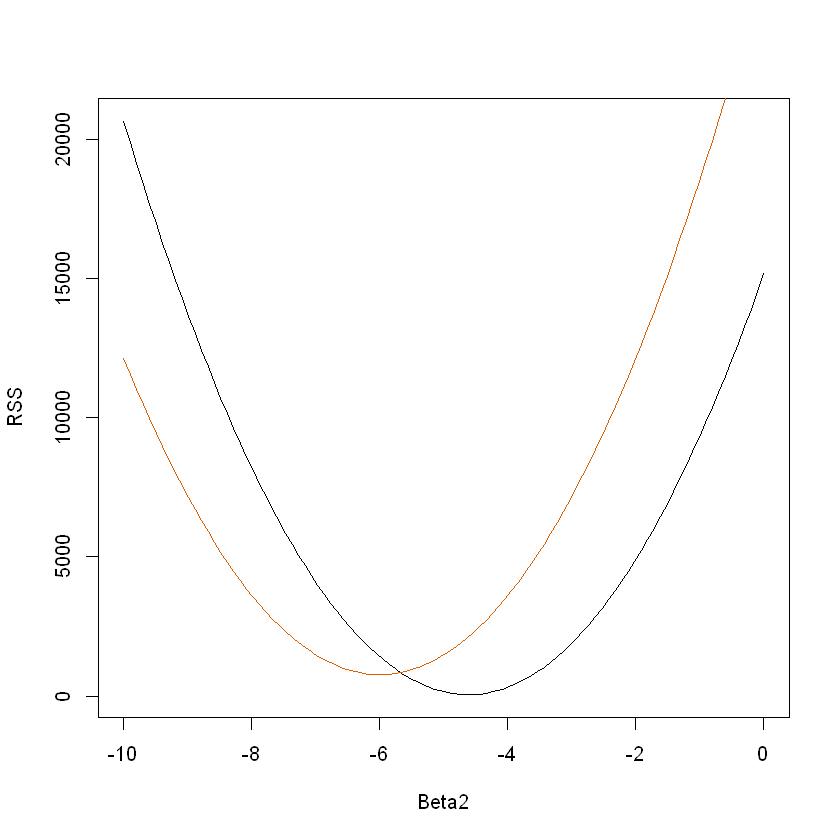

In [8]:
Beta2s<- seq(-10,0,len=100)
plot(Beta2s,sapply(Beta2s,rss,Beta0=55,Beta1=0),
ylab="RSS",xlab="Beta2",type="l")
##Let's add another curve fixing another pair:
Beta2s<- seq(-10,0,len=100)
lines(Beta2s,sapply(Beta2s,rss,Beta0=65,Beta1=0),col=2)

### Exercises P160

In [9]:
data("father.son",package="UsingR")

Q1: What is the average height of the sons (don’t round off)?

In [10]:
mean(father.son$sheight)

[1] 68.68407

Q2: One of the defining features of regression is that we stratify one variable based on others. In
Statistics, we use the verb “condition”. For example, the linear model for son and father heights
answers the question: how tall do I expect a son to be if I condition on his father being x inches?
The regression line answers this question for any x.
Using the father.son dataset described above, we want to know the expected height of sons,
if we condition on the father being 71 inches. Create a list of son heights for sons that have
fathers with heights of 71 inches, rounding to the nearest inch.
What is the mean of the son heights for fathers that have a height of 71 inches (don’t round
off your answer)? Hint: use the function round on the fathers’ heights.

In [14]:
groups <- split(father.son$sheight, round(father.son$fheight))
mean(groups['71'] %>% unlist())

[1] 70.54082

Q3: We say a statistical model is a linear model when we can write it as a linear combination of
parameters and known covariates, plus random error terms. In the choices below, Y represents
our observations, time t is our only covariate, unknown parameters are represented with letters
a, b, c, d and measurement error is represented by ε. If t is known, then any transformation of
t is also known. So, for example, both Y = a + bt + ε and Y = a + bf(t) + ε are linear models.
Which of the following cannot be written as a linear model?

• A) Y = a + bt + ε 

• B) Y = a + b cos(t) + ε 

• C) Y = a + $b^t$ + ε 

• D) Y = a + bt + ct2 + dt3 + ε

C

Q4: Suppose you model the relationship between weight and height across individuals with a linear
model. You assume that the height of individuals for a fixed weight x follows a linear model
Y = a + bx + ε. Which of the following do you feel best describes what e represents?

• A) Measurement error: scales are not perfect.

• B) Within individual random fluctuations: you don’t weigh the same in the morning as
in the afternoon.

• C) Round off error introduced by the computer we use to analyze the data.

• D) Between individual variability: people of the same height vary in their weigh

D

## Vectors, Matrices and Scalars

In [15]:
library(UsingR)
y=father.son$fheight
head(y)

[1] 65.04851 63.25094 64.95532 65.75250 61.13723 63.02254

In [16]:
n <- 25
tt <- seq(0,3.4,len=n) ##time in secs, t is a base function
X <- cbind(X1=tt,X2=tt^2)
head(X)

X1,X2
0.0000000,0.00000000
0.1416667,0.02006944
0.2833333,0.08027778
0.4250000,0.18062500
0.5666667,0.32111111
0.7083333,0.50173611


In [17]:
dim(X)

[1] 25  2

In [18]:
N <- 100; 
p <- 5 
X <- matrix(1:(N*p),N,p)
head(X)

1,101,201,301,401
2,102,202,302,402
3,103,203,303,403
4,104,204,304,404
5,105,205,305,405
6,106,206,306,406


In [19]:
dim(X)

[1] 100   5

In [21]:
N <- 100; 
p <- 5 
X <- matrix(1:(N*p),N,p,byrow=TRUE)
head(X)

1,2,3,4,5
6,7,8,9,10
11,12,13,14,15
16,17,18,19,20
21,22,23,24,25
26,27,28,29,30


### Exercises P165

Q1: 1. In R we have vectors and matrices. You can create your own vectors with the function c.
c(1,5,3,4)
They are also the output of many functions such as:
rnorm(10)
You can turn vectors into matrices using functions such as rbind, cbind or matrix.
Create the matrix from the vector 1:1000 like this:
X = matrix(1:1000,100,10)
What is the entry in row 25, column 3?

In [22]:
X = matrix(1:1000,100,10)
X[25,3]

[1] 225

Q2: Using the function cbind, create a 10 x 5 matrix with first column x=1:10. Then add 2*x, 3*x,
4*x and 5*x to columns 2 through 5. What is the sum of the elements of the 7th row?

In [23]:
a1 = matrix(1:10,10,1)
a2 = matrix(2:20,10,1)
a3 = matrix(3:30,10,1)
a4 = matrix(4:40,10,1)
a5 = matrix(5:50,10,1)
a6 = cbind(a1,a2,a3,a4,a5)
sum(a6[7,])

Warning message in matrix(2:20, 10, 1):
"data length [19] is not a sub-multiple or multiple of the number of rows [10]"
Warning message in matrix(3:30, 10, 1):
"data length [28] is not a sub-multiple or multiple of the number of rows [10]"
Warning message in matrix(4:40, 10, 1):
"data length [37] is not a sub-multiple or multiple of the number of rows [10]"
Warning message in matrix(5:50, 10, 1):
"data length [46] is not a sub-multiple or multiple of the number of rows [10]"


[1] 45

Q3: Which of the following creates a matrix with multiples of 3 in the third column?

• A) matrix(1:60,20,3)

• B) matrix(1:60,20,3,byrow=TRUE)

• C) x=11:20; rbind(x,2*x,3*x)

• D) x=1:40; matrix(3*x,20,2)

In [24]:
sum(matrix(1:60,20,3)[,3])

[1] 1010

In [25]:
sum(matrix(1:60,20,3,byrow=TRUE)[,3])

[1] 630

B

## Matrix Operations

### Multiplying by a scalar

In [27]:
X <- matrix(1:12,4,3)
print(X)

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


In [28]:
a <- 2
print(a*X)

     [,1] [,2] [,3]
[1,]    2   10   18
[2,]    4   12   20
[3,]    6   14   22
[4,]    8   16   24


In [29]:
X <- matrix(1:12,4,3) 
X

1,5,9
2,6,10
3,7,11
4,8,12


In [30]:
t(X)

1,2,3,4
5,6,7,8
9,10,11,12


### Matrix multiplication

In [31]:
X <- matrix(c(1,3,2,1,-2,1,1,1,-1),3,3)
abc <- c(3,2,1) #use as an example
rbind( sum(X[1,]*abc), sum(X[2,]*abc), sum(X[3,]%*%abc))

6
6
7


In [32]:
X%*%abc

6
6
7


### The identity matrix

In [33]:
n <- 5 #pick dimensions
diag(n)

1,0,0,0,0
0,1,0,0,0
0,0,1,0,0
0,0,0,1,0
0,0,0,0,1


### The inverse

In [35]:
X <- matrix(c(1,3,2,1,-2,1,1,1,-1),3,3) 
y <- matrix(c(6,2,1),3,1)
solve(X)%*%y #equivalent to solve(X,y)

1
2
3


### Exercises P171

Q1: Suppose X is a matrix in R. Which of the following is not equivalent to X? 

• A) t( t(X) )

• B) X %*% matrix(1,ncol(X) )

• C) X*1

• D) X%*%diag(ncol(X))

In [36]:
t( t(X) )

1,1,1
3,-2,1
2,1,-1


In [37]:
X

1,1,1
3,-2,1
2,1,-1


In [38]:
X %*% matrix(1,ncol(X) )

3
2
2


In [39]:
X

1,1,1
3,-2,1
2,1,-1


B

Q2: Solve the following system of equations using R:
What is the solution for c?

In [42]:
a = matrix(c(3,4,-5,1,2,2,2,-1,1,-1,5,-5,5,0,0,1),4,4,byrow=T)
b=solve(a) %*% matrix(c(10,5,7,4),4,1)
b[3]

[1] -0.8849558

Q3:Load the following two matrices into R

In [43]:
a <- matrix(1:12, nrow=4) 
b <- matrix(1:15, nrow=3)

Note the dimension of a and the dimension of b.
In the question below, we will use the matrix multiplication operator in R, %*%, to multiply
these two matrices.
What is the value in the 3rd row and the 2nd column of the matrix product of a and b?

In [44]:
c=a%*%b
c[3,2]

[1] 113

Q4: Multiply the 3rd row of a with the 2nd column of b, using the element-wise vector multiplication with *.
What is the sum of the elements in the resulting vector?

In [47]:
a1=a[3,]
b1=b[,2]
sum(a1*b1)

[1] 113

## Examples

### The average

In [1]:
library(UsingR)
y <- father.son$sheight
print(mean(y))

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer




[1] 68.68407


In [3]:
N <- length(y)
Y<- matrix(y,N,1) 
A <- matrix(1,N,1)
barY=t(A)%*%Y / N
print(barY)

         [,1]
[1,] 68.68407


### The variance

In [4]:
barY=crossprod(A,Y) / N
print(barY)

         [,1]
[1,] 68.68407


In [5]:
r <- y - barY
crossprod(r)/N

Warning message in y - barY:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"


7.915196


In [6]:
library(rafalib)
popvar(y)

[1] 7.915196

### Finding LSE in R

In [7]:
library(UsingR)
x=father.son$fheight
y=father.son$sheight
X <- cbind(1,x)
betahat <- solve( t(X) %*% X ) %*% t(X) %*% y
###or
betahat <- solve( crossprod(X) ) %*% crossprod( X, y )

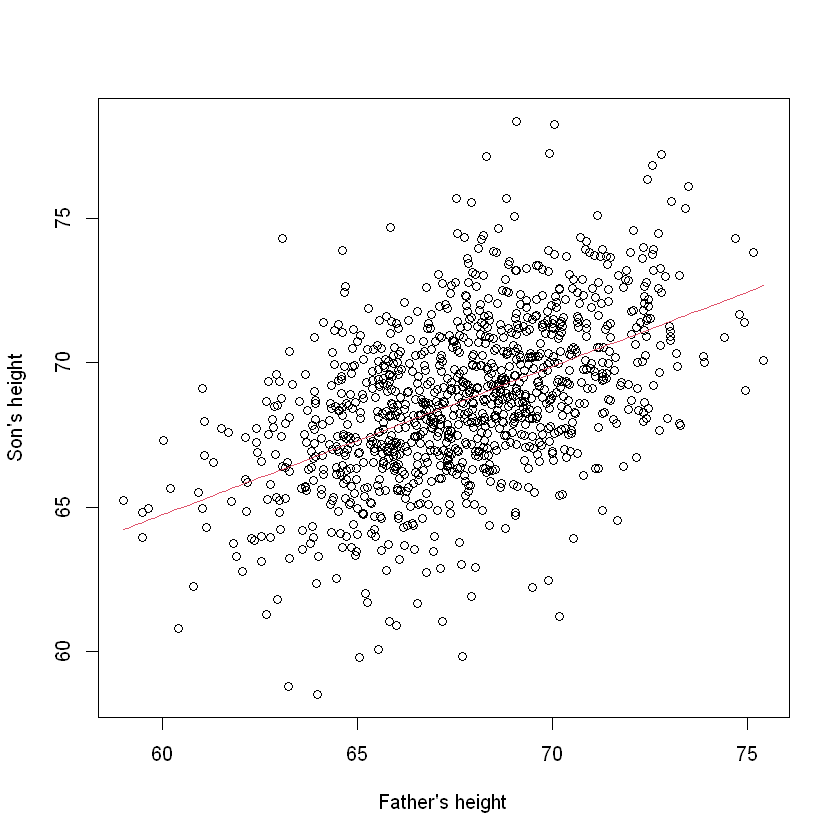

In [8]:
newx <- seq(min(x),max(x),len=100) 
X <- cbind(1,newx)
fitted <- X%*%betahat
plot(x,y,xlab="Father's height",ylab="Son's height")
lines(newx,fitted,col=2)

In [10]:
set.seed(1) 
g <- 9.8 #meters per second
n <- 25
tt <- seq(0,3.4,len=n) #time in secs, t is a base function
d <- 56.67 - 0.5*g*tt^2 + rnorm(n,sd=1)

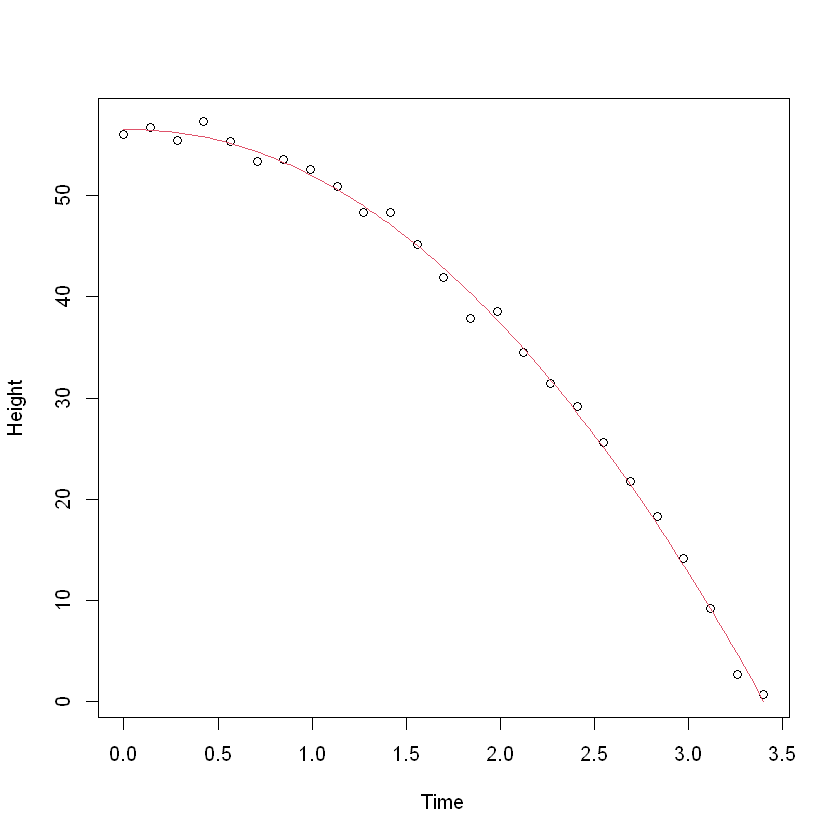

In [11]:
X <- cbind(1,tt,tt^2) 
y <- d
betahat <- solve(crossprod(X))%*%crossprod(X,y)
newtt <- seq(min(tt),max(tt),len=100) 
X <- cbind(1,newtt,newtt^2)
fitted <- X%*%betahat
plot(tt,y,xlab="Time",ylab="Height")
lines(newtt,fitted,col=2)

In [12]:
betahat

,56.5317368
tt,0.5013565
,-5.0386455


### The lm Function

In [13]:
X <- cbind(tt,tt^2)
fit=lm(y~X)
summary(fit)


Call:
lm(formula = y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5295 -0.4882  0.2537  0.6560  1.5455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.5317     0.5451 103.701   <2e-16 ***
Xtt           0.5014     0.7426   0.675    0.507    
X            -5.0386     0.2110 -23.884   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9822 on 22 degrees of freedom
Multiple R-squared:  0.9973,	Adjusted R-squared:  0.997 
F-statistic:  4025 on 2 and 22 DF,  p-value: < 2.2e-16


### Exercise P181

Q1: Suppose we are analyzing a set of 4 samples. The first two samples are from a treatment group
A and the second two samples are from a treatment group B. This design can be represented
with a model matrix like so:

In [14]:
X <- matrix(c(1,1,1,1,0,0,1,1),nrow=4)
rownames(X) <- c("a","a","b","b") 
X

a,1,0
a,1,0
b,1,1
b,1,1


Suppose that the fitted parameters for a linear model give us:

In [15]:
beta <- c(5, 2)

Use the matrix multiplication operator, %*%, in R to answer the following questions:
What is the fitted value for the A samples? (The fitted Y values.)

In [16]:
X[1:2,] %*% beta

a,5
a,5


Q2: What is the fitted value for the B samples? (The fitted Y values.)

In [17]:
X[3:4,] %*% beta

b,7
b,7


Q3: Suppose now we are comparing two treatments B and C to a control group A, each with two
samples. This design can be represented with a model matrix like so:

In [18]:
X <- matrix(c(1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1),nrow=6)
rownames(X) <- c("a","a","b","b","c","c") 
X

a,1,0,0
a,1,0,0
b,1,1,0
b,1,1,0
c,1,0,1
c,1,0,1


Suppose that the fitted values for the linear model are given by:

In [19]:
beta <- c(10,3,-3)

In [20]:
X[3:4,] %*% beta

b,13
b,13


Q4: What is the fitted value for the C samples?

In [21]:
X[5:6,] %*% beta

c,7
c,7
